In [1]:
# Here we demonstarte How to Implement a circuit which returns |00> and |11> with equal probability.
# We are going to use Qiskit to demonstarte this Problem
# At the core, It is about acheiving entanglement, which we can acheive by cnot gate.

In [2]:
# import qiskit lib 
from qiskit import *
%config InlineBackend.figure_format = 'svg'
# import bloch sphere to visulaize what the sate of quibit
from qiskit.tools.visualization import plot_bloch_multivector
from qiskit.tools.visualization import plot_histogram

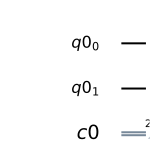

In [3]:
quantum_registers = QuantumRegister(2)
classical_registers = ClassicalRegister(2)

# create a circuit with above created Registers 
quantum_circuit = QuantumCircuit(quantum_registers, classical_registers)

%matplotlib inline
quantum_circuit.draw(output='mpl')



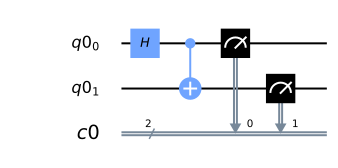

In [4]:
# As initial qubits will be in state 0, it won't be much intetersting so push qubits to superposition using H gate
# Then apply cnot which is actually controlled not 

quantum_circuit.h(0)
quantum_circuit.cx(0,1)
quantum_circuit.measure(quantum_registers[0],classical_registers[0])
quantum_circuit.measure(quantum_registers[1],classical_registers[1])
# Our Final circuit looks like below mentioned circuit 
%matplotlib inline
quantum_circuit.draw(output='mpl')

In [7]:
# Execute the circuit in qasm simulator
simulator_counts = Aer.get_backend('qasm_simulator')

# sampling with 1,10,100 and 1000 iterations
result_1 = execute(quantum_circuit,backend=simulator_counts,shots=1).result()
result_10 = execute(quantum_circuit,backend=simulator_counts,shots=10).result()
result_100 = execute(quantum_circuit,backend=simulator_counts,shots=100).result()
result_1000 = execute(quantum_circuit,backend=simulator_counts,shots=1000).result()


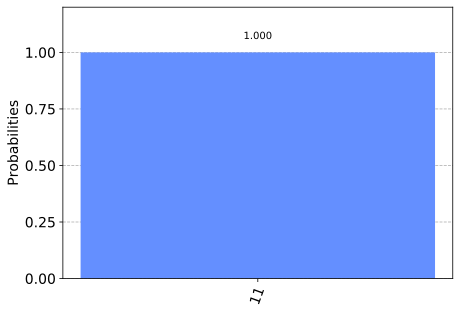

In [8]:
# get counts from results with 1 shot
plot_histogram(result_1.get_counts())

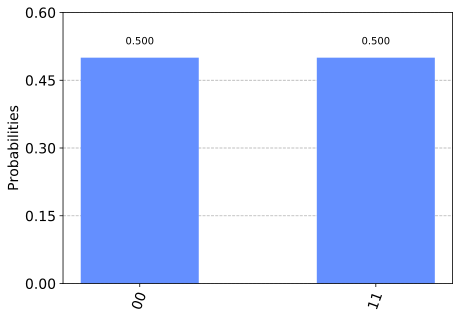

In [9]:
# get counts from results with 10 shot
plot_histogram(result_10.get_counts())

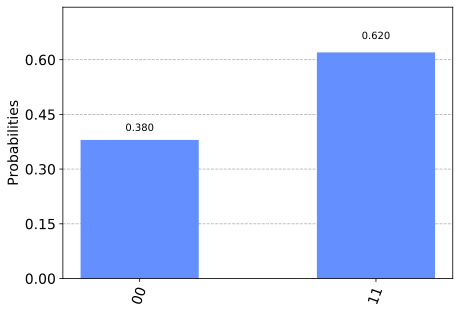

In [10]:
# get counts from results with 100 shot
plot_histogram(result_100.get_counts())

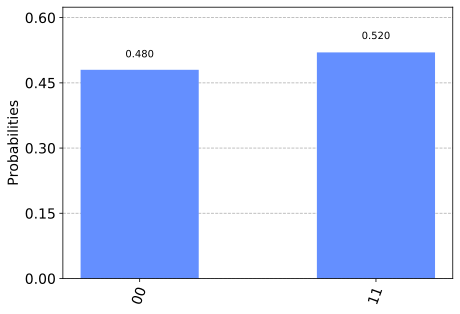

In [11]:
# get counts from results with 1000 shot
plot_histogram(result_1000.get_counts())

In [12]:
# AS we started our state with 0, hadamard will turn it to |0> -> |+>
# so we are almost sure that it will turn into 00>+|11> but not 00>-|11> 